In [1]:
import pandas as pd
df = pd.read_csv('data/port.csv')
df_miss = df[(df['LATITUDE']==-0.386592)|(df['LONGITUDE']==-0.386592)]

def title_city(port):
    return str(port['CITY']).title()

def title_country(port):
    return str(port['COUNTRY']).title()

df_miss.CITY = df_miss.apply(title_city, axis=1)
df_miss.COUNTRY = df_miss.apply(title_country, axis=1)
df_miss

/home/liweikang/.local/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,TRANS_NODE_NAME,LONGITUDE,LATITUDE,COUNTRY,STATE,CITY,REGION,ADDRESS,PORT_CODE,TRANSPORT_NODE_ID
1470,MIAMI_UNITED STATES,0.831116,-0.386592,United States,NaN,Miami,NaN,NaN,NaN,17219000.0
1471,DUBAI_UNITED ARAB EMIRATES,0.831116,-0.386592,United Arab Emirates,NaN,Dubai,NaN,NaN,NaN,17418000.0
1472,LAHORE_PAKISTAN,0.831116,-0.386592,Pakistan,NaN,Lahore,NaN,NaN,NaN,17420000.0
1473,BOGOTA_COLOMBIA,0.831116,-0.386592,Colombia,NaN,Bogota,NaN,NaN,NaN,17421000.0
1475,COLON_PANAMA,0.831116,-0.386592,Panama,NaN,Colon,NaN,NaN,NaN,17425000.0
...,...,...,...,...,...,...,...,...,...,...
2003,AMBARLI_TURKEY,-0.386592,0.831116,All,NaN,Nan,NaN,NaN,NaN,119014000.0
2019,BALI_INDONESIA,0.831116,-0.386592,Indonesia,NaN,Bali,NaN,NaN,NaN,130832000.0
2022,PKICT,0.831116,-0.386592,All,NaN,Nan,NaN,NaN,NaN,135015000.0
2397,AFYON_TURKEY,0.831116,-0.386592,All,NaN,Nan,NaN,NaN,NaN,227214000.0


In [2]:
#df[df['CITY']=='Miami']

#count = 0
for index, row in df_miss.iterrows():
    if(row.CITY in df['CITY'].values):
        df.drop(index,axis=0,inplace=True)

df.CITY = df.apply(title_city, axis=1)
df.COUNTRY = df.apply(title_country, axis=1)
df

,TRANS_NODE_NAME,LONGITUDE,LATITUDE,COUNTRY,STATE,CITY,REGION,ADDRESS,PORT_CODE,TRANSPORT_NODE_ID
0,NP1_POK,83.975602,28.204030,Nepal,Western Development Region,Pokhara,NaN,"Janapriya Marga Lane 2, Pokhara 33700, Nepal",NaN,117000.0
1,NP1_NEP,81.361656,28.023097,India,Uttar Pradesh,Parwani Gauri,NaN,"Nanpara Rd, Parwani Gauri, Uttar Pradesh 27185...",NaN,118000.0
2,NP1_NWP,84.399719,27.696448,Nepal,Western Development Region,Gaindakot,NaN,"Ganesh Mandir Marga, Gaindakot 33000, Nepal",NaN,119000.0
3,NP1_KMDU,85.230904,27.410841,Nepal,Central Development Region,Thingan,NaN,"Unnamed Road, Thingan 44100, Nepal",NaN,120000.0
4,NP1_EDR,87.270927,26.587093,Nepal,Eastern Development Region,Nan,NaN,"Madhelee Duhabi Rd, 56709, Nepal",NaN,121000.0
...,...,...,...,...,...,...,...,...,...,...
2451,Maza,67.112458,36.735551,Afghanistan,Balkh,Mazar-E Sharif,NaN,"Unnamed Road, Mazar-e Sharif, Afghanistan",NaN,281615000.0
2452,LKCOL,79.861243,6.927079,Sri Lanka,Western Province,Colombo,Colombo 10,"Gamini Hall, Colombo 01000, Sri Lanka",NaN,282214000.0
2453,MYPKN,101.392830,2.999852,Malaysia,Selangor,Klang,Kawasan 13,"1, Persiaran Raja Muda Musa, Kawasan 13, 41100...",NaN,282215000.0
2454,CRPLI,-83.041508,9.991311,Costa Rica,Lim?,Lim?,NaN,"Avenida Macarela, El Bamb? Lim?, Costa Rica",NaN,283015000.0


In [20]:
df.to_csv('port_dropped.csv')

In [136]:
ddf = pd.read_csv('port_dropped.csv')
len(ddf[(ddf['LATITUDE']==-0.386592)|(ddf['LONGITUDE']==-0.386592)])

,TRANS_NODE_NAME,LONGITUDE,LATITUDE,COUNTRY,STATE,CITY,REGION,ADDRESS,PORT_CODE,TRANSPORT_NODE_ID


In [135]:
#ddf.drop(['Unnamed: 0'],axis=1,inplace=True)
ddf.to_csv('port_dropped.csv',index=None)

/home/liweikang/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


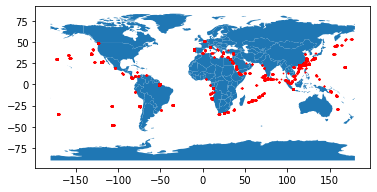

In [5]:
import pandas as pd
import geopandas as gpd
import shapely
# needs 'descartes'

import matplotlib.pyplot as plt

gdf = gpd.GeoDataFrame(train_data.drop(['latitude','longitude'], axis=1),
                       crs={'init': 'epsg:4326'},
                       geometry=[shapely.geometry.Point(xy)
                                 for xy in zip(train_data.longitude, train_data.latitude)])
#print(gdf)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot()
gdf.plot(ax=base, marker='.', color='red', markersize=2)

#plt.savefig('track.png', dpi=600)
plt.show()

In [ ]:
data = pd.read_csv('port_dropped.csv')
data.drop_duplicates(subset=['LONGITUDE','LATITUDE'],keep='first',inplace=True)
#len(data)
data.to_csv('port_fixed.csv',index=None)

In [2]:
train_data = pd.read_csv('/home/liweikang/Documents/hape/data.csv', nrows=10000)
train_data.columns = ['loadingOrder','carrierName','timestamp','longitude',
                  'latitude','vesselMMSI','speed','direction','vesselNextport',
                  'vesselNextportETA','vesselStatus','vesselDatasource','TRANSPORT_TRACE']
train_data.sort_values(['loadingOrder', 'timestamp'], inplace=True)
train_data

,loadingOrder,carrierName,timestamp,longitude,latitude,vesselMMSI,speed,direction,vesselNextport,vesselNextportETA,vesselStatus,vesselDatasource,TRANSPORT_TRACE
499,AE636773257777,KJIHXD,2019-01-01T00:10:22.000Z,114.123333,19.108333,O8605873484,0,-1,NaN,NaN,NaN,Coastal AIS,NaN
165,AF630883821362,JONOCD,2019-01-01T00:04:57.000Z,106.911100,-5.945098,Z9658970283,2,500,JAKARTA,2019-12-31T14:00:00.000Z,under way using engine,Coastal AIS,NaN
1440,AF630883821362,JONOCD,2019-01-01T00:46:37.000Z,106.916043,-5.932576,Z9658970283,1,35750,JAKARTA,2019-12-31T14:00:00.000Z,under way using engine,Satellite,NaN
1877,AF630883821362,JONOCD,2019-01-01T01:01:33.000Z,106.917387,-5.928320,Z9658970283,2,310,JAKARTA,2019-12-31T14:00:00.000Z,under way using engine,Satellite,NaN
4733,AF630883821362,JONOCD,2019-01-01T02:32:54.000Z,106.931900,-5.902475,Z9658970283,2,2700,JAKARTA,2019-12-31T14:00:00.000Z,under way using engine,Coastal AIS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,ZZ391515915222,UQCRKD,2019-01-01T03:37:47.000Z,159.466340,-29.134420,H9283003522,31,11050,AUCKLAND,2019-01-03T08:00:00.000Z,under way using engine,Satellite,NaN
8074,ZZ391515915222,UQCRKD,2019-01-01T04:11:17.000Z,159.640363,-29.188045,H9283003522,32,10920,AUCKLAND,2019-01-03T08:00:00.000Z,under way using engine,Satellite,NaN
8958,ZZ391515915222,UQCRKD,2019-01-01T04:43:00.000Z,159.805082,-29.237160,H9283003522,31,10920,NaN,NaN,NaN,Satellite,NaN
8962,ZZ391515915222,UQCRKD,2019-01-01T04:43:53.000Z,159.809748,-29.238563,H9283003522,31,10970,AUCKLAND,2019-01-03T08:00:00.000Z,under way using engine,Satellite,NaN


In [3]:
from geopy.distance import geodesic
train_data = train_data.groupby('loadingOrder').agg(['first', 'last'],inplace=True).stack()

In [4]:
#pd.set_option('display.max_rows', None)
train_data.head(20)

carrierName                 timestamp   longitude  \
loadingOrder                                                             
AE636773257777 first      KJIHXD  2019-01-01T00:10:22.000Z  114.123333   
               last       KJIHXD  2019-01-01T00:10:22.000Z  114.123333   
AF630883821362 first      JONOCD  2019-01-01T00:04:57.000Z  106.911100   
               last       JONOCD  2019-01-01T05:06:05.000Z  106.882665   
AF641280380594 first      OYSCFP  2019-01-01T02:33:06.000Z   34.905493   
               last       OYSCFP  2019-01-01T03:09:28.000Z   34.794453   
AF801994078018 first      JONOCD  2019-01-01T00:04:57.000Z  106.911100   
               last       JONOCD  2019-01-01T05:06:05.000Z  106.882665   
AJ128547170282 first      KJIHXD  2019-01-01T02:21:01.000Z   60.346200   
               last       KJIHXD  2019-01-01T04:28:27.000Z   59.900317   
AJ916634114427 first      OIEQNT  2019-01-01T01:07:09.000Z -120.385000   
               last       OIEQNT  2019-01-01T04:44:16.000Z -119.425833   
AL160285170587 first      RWHZVZ  2019-01-01T00:02:54.000Z  122.201033   
               last       RWHZVZ  2019-01-01T04:17:15.000Z  123.103333   
AR621186234914 first      RWHZVZ  2019-01-01T01:11:06.000Z   90.718438   
               last       RWHZVZ  2019-01-01T01:54:57.000Z   90.540160   
AT211137428479 first      JCMFTA  2019-01-01T03:12:13.000Z   29.742990   
               last       JCMFTA  2019-01-01T03:12:13.000Z   29.742990   
AU851161490058 first      OYSCFP  2019-01-01T00:03:04.000Z  103.772205   
               last       OYSCFP  2019-01-01T04:47:08.000Z  102.672720   

                       latitude   vesselMMSI  speed  direction  \
loadingOrder                                                     
AE636773257777 first  19.108333  O8605873484      0         -1   
               last   19.108333  O8605873484      0         -1   
AF630883821362 first  -5.945098  Z9658970283      2        500   
               last   -6.051643  Z9658970283     13      17810   
AF641280380594 first  26.692187  H9884968226     32      32510   
               last   26.838720  H9884968226     32      32640   
AF801994078018 first  -5.945098  Z9658970283      2        500   
               last   -6.051643  Z9658970283     13      17810   
AJ128547170282 first -17.929750  D6829076019      0         -1   
               last  -18.234917  D6829076019      0         -1   
AJ916634114427 first  26.431333  B5626507158     28      11290   
               last   26.043333  B5626507158     29      11470   
AL160285170587 first  30.557383  A7207180118     25       9700   
               last   30.655000  A7207180118     22       7700   
AR621186234914 first   3.031552  K6837163273     32      23250   
               last    2.905325  K6837163273     33      23540   
AT211137428479 first  40.760390  U7465108673      0      20500   
               last   40.760390  U7465108673      0      20500   
AU851161490058 first   1.264275  Q5902305767     14      24700   
               last    1.741685  Q5902305767     34      30750   

                         vesselNextport         vesselNextportETA  \
loadingOrder                                                        
AE636773257777 first                NaN                       NaN   
               last                 NaN                       NaN   
AF630883821362 first            JAKARTA  2019-12-31T14:00:00.000Z   
               last             JAKARTA  2019-12-31T15:00:00.000Z   
AF641280380594 first             EG SUZ  2019-01-01T12:00:00.000Z   
               last              EG SUZ  2019-01-01T12:00:00.000Z   
AF801994078018 first            JAKARTA  2019-12-31T14:00:00.000Z   
               last             JAKARTA  2019-12-31T15:00:00.000Z   
AJ128547170282 first                NaN                       NaN   
               last                 NaN                       NaN   
AJ916634114427 first      CN NGB>MX ZLO  2019-01-03T13:00:00.000Z   
               last       CN NGB>MX ZLO  2

In [10]:
port = pd.read_csv('port_fixed.csv')
port[port['COUNTRY']=='Turkey']

,TRANS_NODE_NAME,LONGITUDE,LATITUDE,COUNTRY,STATE,CITY,REGION,ADDRESS,PORT_CODE,TRANSPORT_NODE_ID
703,TRIZM,27.061174,38.410076,Turkey,?zmir,Izmir (Smyrna),NaN,"Bah?leraras? Mahallesi, Engelliler Mrk. ?? Yol...",NaN,3042000.0
704,IST,28.806323,40.983637,Turkey,?stanbul,Istanbul,NaN,"?enlikk? Mahallesi, Ye?ilk? Cd. No:5, 34153 Ba...",NaN,3043000.0
705,TRAMR,28.669267,40.989325,Turkey,?stanbul,Istanbul,NaN,"Yakuplu Mahallesi, Ard??Sk. No:8, 34524 Beylik...",NaN,3044000.0
706,TRHAY,29.027284,41.014824,Turkey,?stanbul,Istanbul,NaN,"Zeynep Kamil Mahallesi, Nuhkuyusu Cd No:41, 34...",NaN,3045000.0
707,TRIST,28.988140,41.036481,Turkey,?stanbul,Istanbul,NaN,"G??suyu Mahallesi, Atat?k K?t? Mrk. AKM, 34437...",NaN,3046000.0
713,TRIZT,27.146116,38.438182,Turkey,?zmir,Izmir,NaN,"Alsancak Mahallesi, 1463. Sk. No:9, 35220 Kona...",NaN,3053000.0
714,TRBSU,29.159628,41.219484,Turkey,?stanbul,Istanbul,NaN,"Anadolufeneri Mahallesi, Kabakoz Yolu No:10, 3...",NaN,3054000.0
985,538955,29.442600,40.790210,Turkey,Kocaeli,Nan,NaN,"Tatl?kuyu Mahallesi, Ahmet Pembeg?l?Blv. No:73...",NaN,3334000.0
1295,TRTEK,27.510109,40.977436,Turkey,Tekirda?,Tekirda,NaN,"Yavuz Mahallesi, Bayol Pasaj?, 59200 S?eymanpa...",NaN,3783000.0
1296,TRMPT,28.712027,40.988313,Turkey,?stanbul,Istanbul,NaN,"Cihangir, Karacao?lan Sk. No:33, 34310 Avc?lar...",NaN,3823000.0
